# 🌐 **Social Networks and Online Markets** 🌐
# **Homework**
## Girolami Mattia - 20746424


---



## Problem 1



### Solution:
<br>

We know that a node $u$ is selected with probability:
<br>
 $$ \frac{d_u + c}{(t − 1)(2ℓ + c)} = \frac{d_u + c}{\sum_{w \in V_{t-1}} (d_w+ c)} $$

<br>

We know that a single node is added at every time step $t$ and we also know that the probabiity that a node $u$ of degree $k$ to become $k+1$ (at time $T+1$) is:

$$ l \cdot \frac{d_u + c}{\sum_{w \in V_{t-1}} (d_w+ c)}\  = \ l \cdot \frac{d_u + c}{2tl + tc} \  =\  \frac{d_u+c}{2t + \frac{tc}{l}} \ = \ \frac{K+c}{2t + \frac{tc}{l}} $$

Remembering that:
*   $n_K(t)$ = number of nodes at time t with degree K
*   $p_k(t) \ = \ \frac{n_K(t)}{t} $ = probability for a node of being K-degree at time T $ \ \ \ \ \ \{⋆\}$

<br><br>
In order to compute the number of nodes of degree $K$ at time $t+1$ we need to sum the nodes of degree $K$ at time $t$, plus the nodes that were of degree $K-1$ and are becoming of degree $K$ and finally we need to subtract the nodes of degree $K$ that will become $K+1$:
<br><br>
$n_K(t+1) \ = \ n_K(t) + n_{K-1}(t) \frac{K-1+c}{2t+ \frac{tc}{l}} - n_K(t) \frac{K+c}{2t+ \frac{tc}{l}} $
<br><br>
Now, using $\{⋆\}$ we get:
<br>
$(t+1)p_K(t+1)\ = \ t\ p_K(t) + p_{K-1}(t) \ t \ \frac{K-1+c}{2t+ \frac{tc}{l}} \ -\ p_K(t) \ t \ \frac{K+c}{2t+ \frac{tc}{l}} \ \ $

$(t+1)p_K(t+1)\ = \ t \ p_K(t) + p_{K-1}(t)  \ \frac{K-1+c}{2+ \frac{c}{l}} \ -\ p_K(t) \ \frac{K+c}{2+ \frac{c}{l}}$

<br><br>
We want the distribution of $p_K(t)$ as $t → ∞$, when it has converged to some value independent of t, we will call it $p_K$.<br> In that way we will have $p_K(t+1) = p_K(t) = p_K$
<br>

$(t+1)\ p_K\ = \ t \ p_K + p_{K-1}  \ \frac{K-1+c}{2+ \frac{c}{l}} \ -\ p_K \ \frac{K+c}{2+ \frac{c}{l}}$
<br>
$p_K = p_{K-1}  \ \frac{K-1+c}{2+ \frac{c}{l}} \ -\ p_K \ \frac{K+c}{2+ \frac{c}{l}}$
<br><br>
$p_K = p_{K-1} \frac{K+c-1}{K+c+ \frac{c}{l} + 2}$
<br><br>

I want $p_K \ = \ p_{K-1}$ in the long run, so i want both the terms of the equation above to be equal. In specific i want $ → \frac{K+c-1}{K+c+ \frac{c}{l} + 2} = 1$
<br>
$K+2+c+\frac{c}{l} = K-1+c$
<br><br>
In this way I obtain $3+\frac{c}{l}$ which is the exponent of the power law.



---



## Problem 2

### Solution:

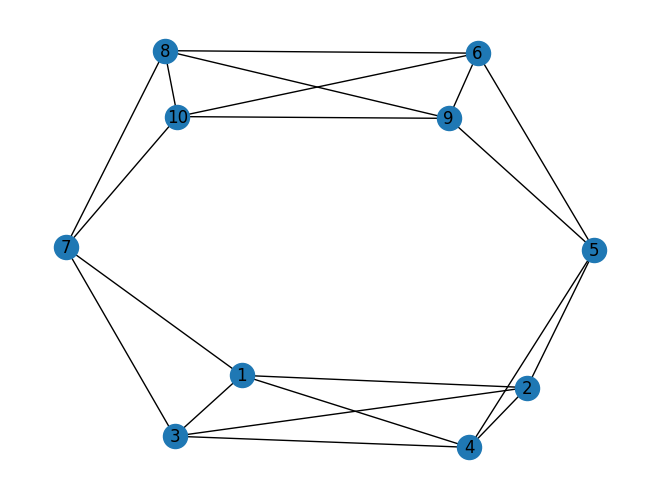

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations
import math

G = nx.Graph()
G.add_nodes_from([1, 2, 3, 5, 6, 7, 8, 10])

G.add_edges_from([(1, 2), (1, 3), (1, 4), (1, 7),
                  (2, 3), (2, 4), (2, 5),
                  (3, 4), (3, 7),
                  (4, 5),
                  (5, 6), (5, 9),
                  (6, 8), (6, 9), (6, 10),
                  (7, 8), (7, 10),
                  (8, 9), (8, 10), (9, 10)
                  ])

pos = nx.spring_layout(G)
nx.draw(G, pos = pos, with_labels=True)
plt.show()

#### Greedy Algorithm

In [2]:
def calculate_sparsity(S):
  return (nx.number_of_edges(S)/nx.number_of_nodes(S))

def greedy_densest_subgraph(G):

  spars = [calculate_sparsity(G)]

  S = G.copy()
  S_G = G.copy()

  while nx.number_of_nodes(S) > 1:

    v =  min(S.degree, key = lambda x : x[1])[0]
    S.remove_node(v)

    spars.append(calculate_sparsity(S))

    if (calculate_sparsity(S) >= max(spars)):
      S_G = S.copy()

  return (S_G, max(spars))

The sparsity of the densest subgraph is:  2.0
The graph with the highest sparsity is:


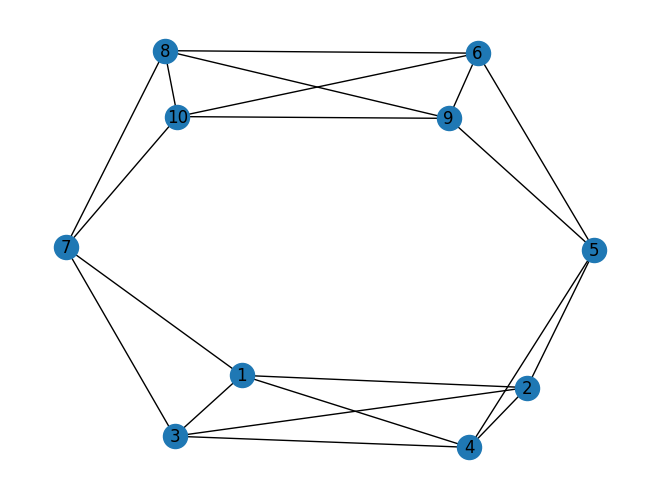

In [3]:
densest_subgraph = greedy_densest_subgraph(G)

print("The sparsity of the densest subgraph is: ", densest_subgraph[1])
print("The graph with the highest sparsity is:")
nx.draw(densest_subgraph[0], pos=pos, with_labels = True)
plt.show()

#### Minimum Cut

In [4]:
def mincut(G):

  _G = G.copy()

  cut_value = nx.minimum_edge_cut(_G)

  _G.remove_edges_from(cut_value)
  return (_G, cut_value)


In [5]:
(G_cut, cut_size) = mincut(G)

print("The minimum cut size is: ", len(cut_size))

The minimum cut size is:  4


The minimum cut size is 4 as expected, this is because in our graph every node has degree 4, so every cut that isolates a node is a mincut.

 #### Demonstrate (by calculating $\lambda_2$, $\phi(G)$, etc.) that Cheeger's inequalities hold for this graph.

In [6]:
def calculate_D(G):
  deg = list()
  for node in G.nodes():
    deg.append(G.degree(node))
  I = np.identity(10)

  return (deg*I)

In [7]:
def cut_size(graph, subset):
    cut_size = 0
    for node in subset:
        for neighbor in graph.neighbors(node):
            if neighbor not in subset:
                cut_size += 1
    return cut_size

In [8]:
def degree_sum(graph, subset):
    subset_G = graph.subgraph(subset)
    subset_degree_sum = sum(subset_G.degree(node) for node in subset_G.nodes())

    remaining_nodes = [node for node in list(graph.nodes()) if node not in list(subset_G.nodes())]

    remaining_graph = graph.subgraph(remaining_nodes)

    remaining_degree_sum = sum(remaining_graph.degree(node) for node in remaining_graph.nodes())
    return subset_degree_sum, remaining_degree_sum


In [9]:
def calculate_conductance(G, sub_2=0):
  subset = list()

  conductance_dict = dict()

  if (sub_2 == 0):
    subset.append(1)
    for i in range(2,9):
      subset.append(i)
      size_of_cut = cut_size(G, subset)
      subset_degree_sum, remaining_degree_sum = degree_sum(G, subset)
      conductance = size_of_cut / min(subset_degree_sum, remaining_degree_sum)
      conductance_dict[tuple(subset)] = conductance
  else:
    for elem in sub_2:
      subset.append(elem)
      size_of_cut = cut_size(G, subset)
      subset_degree_sum, remaining_degree_sum = degree_sum(G, subset)
      min_ds = min(subset_degree_sum, remaining_degree_sum)
      conductance = size_of_cut / (min_ds if min_ds > 0 else 1)
      conductance_dict[tuple(subset)] = conductance

  return(conductance_dict)


In [10]:
A = nx.adjacency_matrix(G).todense()
D = calculate_D(G)

L = D-A
L_norm = L/4

normalized_eigenvalues, normalized_eigenvectors = np.linalg.eig(L_norm)

lambda_2 = sorted(normalized_eigenvalues)[1].real

graph_conductance = calculate_conductance(G)
phi_G = min(graph_conductance.values())
first_set = next(key for key, value in graph_conductance.items() if value == phi_G)
second_set = tuple(node for node in list(G.nodes()) if node not in first_set)



if (lambda_2/2 <= phi_G and math.sqrt(2*lambda_2)):
  print("Cheeger's inequalities hold")
  print("because ", lambda_2/2, "<=", phi_G, "<=", math.sqrt(2*lambda_2))
else:
  print("Cheeger's inequalities don't hold.")

Cheeger's inequalities hold
because  0.12499999999999994 <= 0.25 <= 0.7071067811865474


In [11]:
print("The cut that satisfies the Cheeger's inequalities is: ", first_set, second_set)

The cut that satisfies the Cheeger's inequalities is:  (1, 2, 3, 4, 5) (6, 7, 8, 10, 9)


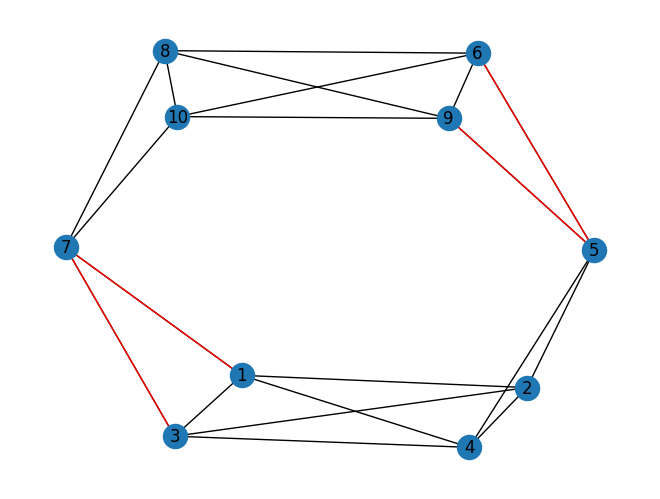

In [12]:
nx.draw(G,pos=pos, with_labels=True)
nx.draw_networkx_edges(G,pos=pos,  edgelist=[(5,6),(5,9),(1, 7),(3, 7)], edge_color='red')

plt.show()

#### Sweeping(G) method

In [13]:
sorted_idx = np.argsort(normalized_eigenvalues.real)
sorted_eigvals = [normalized_eigenvalues[i] for i in sorted_idx]
sorted_eigvectors = [normalized_eigenvectors[i] for i in sorted_idx]

In [14]:
second_smallest_eigenvalue = sorted_eigvals[1]
associated_eigenvector = sorted_eigvectors[1]

nodes_dict = {index+1: value for index, value in enumerate(associated_eigenvector)}
sorted_nodes_dict = {k: v for k, v in sorted(nodes_dict.items(), key=lambda item: item[1], reverse=False)}

In [15]:
to_remove_2 = list(sorted_nodes_dict.keys())
conductance_sweeping = calculate_conductance(G, to_remove_2)
conductance_sweeping.popitem()

phi_G_2 = min(conductance_sweeping.values())

if (second_smallest_eigenvalue.real/2 <= phi_G_2 <= math.sqrt(2*second_smallest_eigenvalue.real)):
  print("Cheeger's inequalities hold")
else:
  print("Cheeger's inequalities don't hold.")

Cheeger's inequalities don't hold.


We can notice that by using the Sweeping algorithm, which is an approximation method, we find a cut for which Cheeger's inequalities don't hold. This is probably because the original graph has two cliques, but they are not well separated, making it difficult for the algorithm to effectively distinguish between the two parts.



---



## Problem 3

### Solution:

#### First prove

Given:
* $G = (V,E)$ undirect graph
* $X$ = degree of a random chosen node
* $Y$ = average degree of the neighbour of $X$

We can define:
* $v \in V$ random chosen node
* $d(v)$ degree of $v$
* $N(v)$ set of nodes neighbours of $v$
* $d(u)$ degree of a neighbour $u \in N(v)$

<br><br>
For a chosen node $v$, the average degree of his neighbours is:
$$
  Y_v\ = \ \frac{1}{d(v)}\sum_{u\in N(v)} d(u)\ =\ \frac{\text{sum of the degree of the neighbours}}{\text{number of neighbours}}
$$
<br><br>
Given $X$, the degree of a random chosen node is:

$$
E[X] = \frac{1}{|V|} \sum_{v \in V}d(v) = \frac{\text{sum of the degree of all the nodes}}{\text{number of nodes}}
$$


Notice that, summing the degree of all the nodes is equal to count each edge twice so we can also write:
$$
E[X] = \frac{2|E|}{|V|}
$$
<br><br>

The expected average degree of neighbours $E[Y]$ is:
$$
E[Y]\ = \ \frac{1}{|V|}\sum_{v \in V}Y_v\ = \ \frac{1}{|V|} \sum_{v \in V} \left( \frac{1}{d(v)} \sum_{u \in N(v)} d(u) \right)
$$

Where:
$$
\sum_{v \in V} \sum_{u \in N(v)} d(u) = 2|E| \  \ \ \text{because i'm counting each edge twice}
$$
<br><br>
Notice that we can rewrite the previous equation also in the following way:

$$
\sum_{(u,v) \in E} = d(u) + d(v) = 2|E|  \ \ \ \ \ (\star)
$$

<br><br>

Taking again $E[Y]$, we can write it as:
$$
E[Y]\ = \ \frac{1}{|V|} \sum_{v \in V} \left( \frac{1}{d(v)} \sum_{u \in N(v)} d(u) \right) = \ \frac{1}{|V|} \sum_{v \in V} \sum_{u \in N(v)} \frac{d(u)}{d(v)}
$$
<br><br>
Now, using $(\star)$ and the provided hint $\frac{a}{b} + \frac{b}{a} \geq 2$ we can write:

$$
\frac{1}{|V|} \sum_{(u, v) \in E} \frac{d(u)}{d(v)}+\frac{d(v)}{d(u)} = E[Y]
$$

$$↓ \text{hint}$$

$$
\frac{1}{|V|} \sum_{(u, v) \in E} \frac{d(u)}{d(v)}+\frac{d(v)}{d(u)} \ \geq \ \frac{1}{|V|} 2|E|
$$
<br><br>

But this is exactly:
$$
E[Y] \geq E[X]
$$


#### Second prove

The situation in which $E[X]=E[Y]$ occurs only in regular graphs, where each node has the same degree $k$.
In fact, in a regular graph:
$$d(v)=k \ \ \ \forall \ \ \ v \in V$$

Since every node has the same degree $k$, the degree of any neighbor is also $k$. Therefore, the average degree of neighbors is:
$$Y=k$$

Thus, in a regular graph, the average degree of a random node $v$ and the average degree of its neighbors will be equal to:
$$E[X]=E[Y]=k$$




---



## Problem 4

### Solution:

The proposed algorithm is the following:

In [16]:
from collections import defaultdict, deque
import networkx as nx
import numpy as np
import random

In [17]:
def remove_edge(adj_list, i, j):
  adj_list[i].remove(j)
  adj_list[j].remove(i)

In [18]:
def add_edge(adj_list, i, j):
  adj_list[i].add(j)
  adj_list[j].add(i)

In [19]:
# check_path is a flag that is True only when the function has to check if there is a path between two nodes.
def bfs_check_conn(adj_list, start, finish = 0, check_path = True):

  visited = set()
  queue = deque([start])

  while queue:
    current = queue.popleft()
    visited.add(current)

    for neighbor in adj_list[current]:

      if check_path:
        if finish == neighbor: return True

      if neighbor not in visited:
          visited.add(neighbor)
          queue.append(neighbor)

  return True if len(visited) == 5 else False

In [20]:
window_size = 5
window = deque()

adj_list = defaultdict(set)

num_simulations = 1000
conn_list = list()
nodes = list(range(1, 6))

for n in range(1, num_simulations):

  i, j = random.sample(nodes, 2)

  # Add only edges that are not already in the graph
  while i in adj_list[j]:
    i, j = random.sample(nodes, 2)

  window.append((i, j))
  add_edge(adj_list, i, j)

  if len(window) < window_size:

    conn_list.append(False)
    continue

  else:
    leaving_edge = window.popleft()
    remove_edge(adj_list, leaving_edge[0], leaving_edge[1])

    # If the graph was previoulsy connected check only if there is a path that connect the two disconnected nodes
    if conn_list[-1]:
      conn_list.append(True) if bfs_check_conn(adj_list, leaving_edge[0], leaving_edge[1]) else conn_list.append(False)
    else:
    # If the graph wasn't connected at the previous step we need to check the connectivity of the entire structure
      conn_list.append(bfs_check_conn(adj_list, i, check_path = False))

In [21]:
print(f"With a 5 node graph and a windows size equal to 5, the graph results connected {conn_list.count(True)} times on {num_simulations} simulations.")

With a 5 node graph and a windows size equal to 5, the graph results connected 604 times on 1000 simulations.


#### **Space Complexity**

The space complexity depends primarily on two components:


*   `adj_list`: This is used to store the graph, which has a space complexity of $\ O(|V|+|E|)$, where $V$ is the number of vertices and $E$ is the number of edges. But, since the number of edges here it's restricted by the window size $W$, the maximum number of edges stored at any time is $W$, making the space complexity $O(|N|+|W|)$.
*   `window`: This is used to maintain the most recent $W$ edges. Hence, it has a space complexity of $O(W)$.

\
Combining both components, the total space complexity is:
$$O(|N|+|W|)$$


#### **Update Time Complexity**


The update time involves the following steps:


*   **Adding an Edge**: Adding an edge to the adjacency list and the window is $O(1)$ operation for each.
*   **Removing an Edge**: Removing an edge from the adjacency list and the window is also $O(1)$ operation for each.
*   **Checking Connectivity** (`bfs_check_conn`): The BFS operation in the worst case will visit all vertices and edges connected to the starting vertex. The time complexity of BFS is $O(|N|+|W|)$, where $N$ is the number of vertices and $W$ is the size of the sliding window.


\
The `bfs_check_conn` function is called once per edge update, and since edge addition and removal are $O(1)$ operations, the dominant part is the BFS check.
\
\
Therefore, the total update time complexity is:
$$O(|N|+|W|)$$



---


#### **Summary**

<center><h3><b>Space Complexity</b>: $O(|N|+|W|)$ </center>
<center><h3><b>Update Time Complexity</b>: $O(|N|+|W|)$ </center>




---



## Problem 5

### **Backfire Effect Model**

To model the backfire effect, my approach is to represent the phenomenon as follows:

- The community is modeled as an undirected, weighted graph $G = (V, E)$, where each person is a node, and an edge exists between two nodes if they are 'friends' or interact in some way.
- Each node $i$ has an opinion score $ o_i \in [-1, 1] $.
- Each edge $(i, j)$ has a weight $ w_{i,j} \in [0, 1] $, randomly assigned, representing the influence value of node $i$ on its neighbor $j$.

The interaction between two individuals $i$ and $j$ changes their opinions based on the difference in their current opinions. At each time step $t$, not all neighbors interact with the selected node; instead, only a randomly selected subset of them participate in the interaction.
\
\
The opinion update rule for an individual $i$ interacting with individual $j$ is the following:\
\
$$
   o_i(t+1) = o_i(t) + f(o_i(t),\ o_j(t), w_{i,j})
$$
\
Where $ f(o_i, o_j, w_{i, j}) $ is a function that captures the change in opinion due to interaction.
\
\
To incorporate the backfire effect, we use the following function:
\
$$ f(o_i, o_j, w_{i,j}) =
\begin{cases}
w_{i, j} \cdot \text{agreement_coeff} \cdot (o_j - o_i) & \text{if } |o_j - o_i| \leq \delta \\
w_{i, j} \cdot \text{disagreement_coeff} \cdot (o_j - o_i) & \text{if } |o_j - o_i| > \delta
\end{cases}
$$
Where:
  

*   $ \text{agreement_coeff} \in (0, 1] $ is a parameter that controls the convergence rate when opinions are close.
*   $ \text{disagreement_coeff} \in [-1, 0) $ is a parameter that controls the divergence rate when opinions are far apart.
*   $\delta $ is a threshold that determines the boundary between convergence and divergence.
\

\
The idea behind this model is that, when two individuals have similar opinions $( |o_j - o_i| \leq \delta )$, the convergence rate parameter ensures that their opinions become more similar, taking also into account the "influence factor" given by the edge weight $w_{ij}$.

On the other hand, when two individuals have dissimilar opinions $(|o_j - o_i| > \delta)$, the divergence rate parameter ensures that their opinions become more different, again weighted by $w_{ij}$.

### **Simulation**

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [23]:
def update_opinion(x_i, x_j, w_ij, agree_coefficient, disagree_coefficient):
    if abs(x_j - x_i) <= delta:
        return w_ij * agree_coefficient * (x_j - x_i)
    else:
        return w_ij * disagree_coefficient * (x_j - x_i)

In [24]:
N = 100
T = 50
agree_coefficient = 0.1
disagree_coefficient = -0.1
delta = 0.5

opinions = np.random.uniform(-1, 1, N)

G = nx.erdos_renyi_graph(N, 0.05)

for (u, v) in G.edges():
    G[u][v]['weight'] = np.random.uniform(0, 1)

opinion_history = [opinions.copy()]

for t in range(T):
    new_opinions = opinions.copy()

    for i in range(N):
        neighbors = list(G.neighbors(i))

        if neighbors:
            # Only random neighbors interact
            interactive_neighbors = 1 if len(neighbors) == 1 else np.random.randint(low=1, high= len(neighbors))
            j_list = np.random.choice(neighbors, size=interactive_neighbors, replace=False)

            for j in j_list:
              w_ij = G[i][j].get('weight')
              new_opinions[i] += update_opinion(opinions[i], opinions[j], w_ij, agree_coefficient, disagree_coefficient)
              new_opinions[j] += update_opinion(opinions[j], opinions[i], w_ij, agree_coefficient, disagree_coefficient)

    opinions = np.clip(new_opinions, -1, 1)
    opinion_history.append(opinions.copy())

opinion_history = np.array(opinion_history)

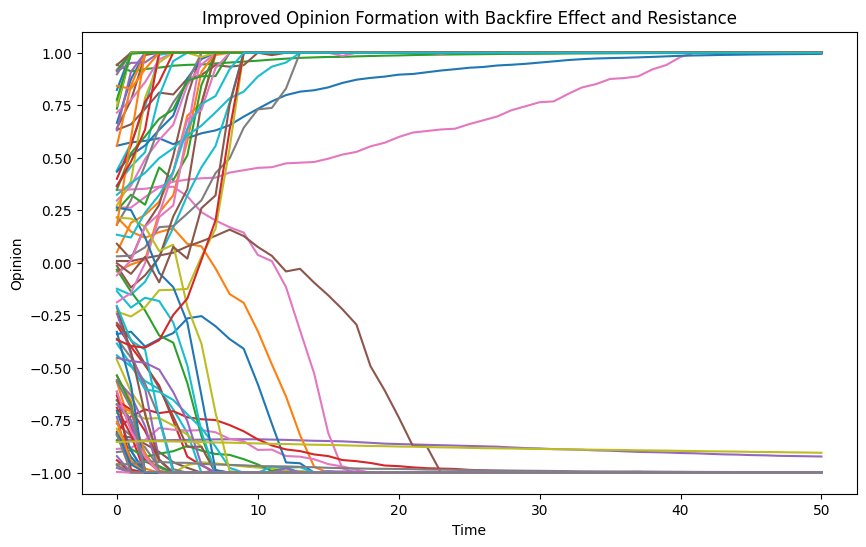

In [25]:
plt.figure(figsize=(10, 6))
for i in range(N):
    plt.plot(opinion_history[:, i])
plt.xlabel('Time')
plt.ylabel('Opinion')
plt.title('Improved Opinion Formation with Backfire Effect and Resistance')
plt.show()

As described by the model, at each time step $T$, every node interacts with a randomly selected subset of its neighbors. During these interactions, nodes adjust their opinion scores based on the "distance" between their opinions. This process causes the model's overall opinion to converge to $1$ or diverge to $-1$.



---



## Problem 6

In [26]:
pip install torch-geometric

In [27]:
import pandas as pd
import seaborn as sns
import networkx as nx
import numpy as np

In [28]:
from tqdm.notebook import tqdm
from collections import Counter
from matplotlib import pyplot as plt

import torch
import torch.nn as nn
from torch.optim import Adam
from torch import no_grad, cat
import torch.nn.functional as F
from torch.cuda import is_available

from torch_geometric.nn import GCNConv, SAGEConv, GATConv
import torch_geometric.transforms as T
from torch_geometric.datasets import Planetoid
from torch_geometric.utils import to_networkx, negative_sampling, degree

from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

In [29]:
dataset = Planetoid(root='/tmp/PubMed', name='PubMed')
graph = dataset[0]

In [30]:
def convert_to_networkx(graph):
	g = to_networkx(graph, node_attrs=['x'])
	y = graph.y.numpy()
	return g, y

def plot_graph(g, y):
	plt.figure(figsize=(9,7))
	nx.draw_spring(g, node_size=30, arrows=False, node_color=y)
	plt.show()

In [31]:
# This line has been commented because it's really time consuming
'''
g, y = convert_to_networkx(graph)
plot_graph(g, y)
'''

'\ng, y = convert_to_networkx(graph)\nplot_graph(g, y)\n'

### Exploratory Data Analysis

#### **Network Structure**

**Number of nodes and edges**

In [32]:
num_nodes = graph.num_nodes
num_edges = graph.num_edges
print(f'Number of nodes: {num_nodes}')
print(f'Number of edges: {num_edges}')

Number of nodes: 19717
Number of edges: 88648


**Average citations per publication**

In [33]:
avg_citations = num_edges / num_nodes
print(f'Average citations per publication: {round(avg_citations, 3)}')

Average citations per publication: 4.496


**Citation distribution**

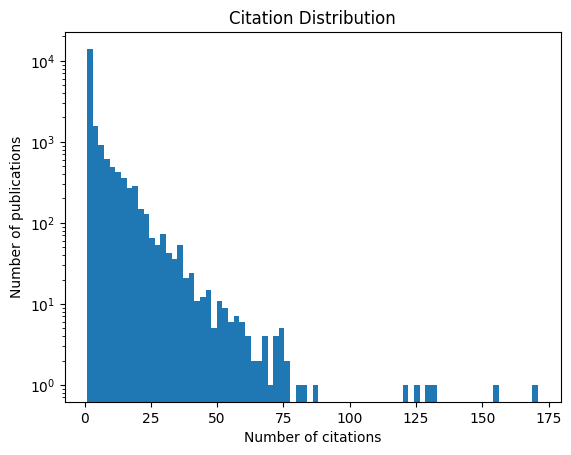

In [34]:
degrees = degree(graph.edge_index[0], num_nodes)
plt.hist(degrees.numpy(), bins = 80)
plt.xlabel('Number of citations')
plt.ylabel('Number of publications')
plt.title('Citation Distribution')
plt.yscale('log')
plt.show()

**Clustering coefficient**

In [35]:
G = nx.Graph()
G.add_edges_from(graph.edge_index.t().tolist())
clustering_coefficients = nx.clustering(G)
avg_clustering_coefficient = sum(clustering_coefficients.values()) / len(clustering_coefficients)
print(f'Average clustering coefficient: {avg_clustering_coefficient}')

Average clustering coefficient: 0.06017520943752363


#### **Node Features**

In [36]:
pip install umap-learn

In [37]:
x = graph.x.numpy()
y = graph.y.numpy()

nodes_tfidf_df = pd.DataFrame(x)
nodes_tfidf_df['label'] = y

In [38]:
correlation_matrices = {}
sorted_correlations = {}

for category in nodes_tfidf_df['label'].unique():

    category_df = nodes_tfidf_df[nodes_tfidf_df['label'] == category].drop(columns=['label'])

    correlation_matrix = category_df.corr()

    correlation_matrices[category] = correlation_matrix

    category_correlations = correlation_matrix.abs().mean().sort_values(ascending=False)

    sorted_correlations[category] = category_correlations

top_correlated_words_df = pd.DataFrame()

for category, correlations in sorted_correlations.items():
    top_10_words = correlations.head(10)
    top_correlated_words_df[f'Category {category}'] = top_10_words.index
    top_correlated_words_df[f'Correlation {category}'] = top_10_words.values


The table below reveals that certain words, like **149** and **49**, are common across all three classes. Other words, however, are more prevalent in pairs of classes or specific to just one class. This pattern is expected given that the dataset comprises medical-scientific publications, which share a common language across categories. Additionally, the presence of class-specific words is understandable, as the articles focus on different topics.

In [39]:
top_correlated_words_df

,Category 1,Correlation 1,Category 0,Correlation 0,Category 2,Correlation 2
0,149,0.061740,149,0.047066,196,0.069020
1,49,0.054166,196,0.042581,15,0.062469
2,162,0.053493,379,0.040326,149,0.060648
3,306,0.052046,15,0.039746,477,0.056833
4,139,0.049536,386,0.038312,379,0.056564
5,231,0.048574,49,0.038260,471,0.053907
6,123,0.046976,13,0.035640,49,0.053342
7,248,0.046447,248,0.035394,321,0.050323
8,44,0.046361,53,0.035351,306,0.048367
9,329,0.045419,9,0.035348,247,0.048091


In [40]:
import umap
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

umap_model = umap.UMAP(n_components=2, random_state=42)
umap_result = umap_model.fit_transform(nodes_tfidf_df.drop(columns=['label']))

umap_df = pd.DataFrame(data=umap_result, columns=['UMAP1', 'UMAP2'])
umap_df['class'] = graph.y.numpy()

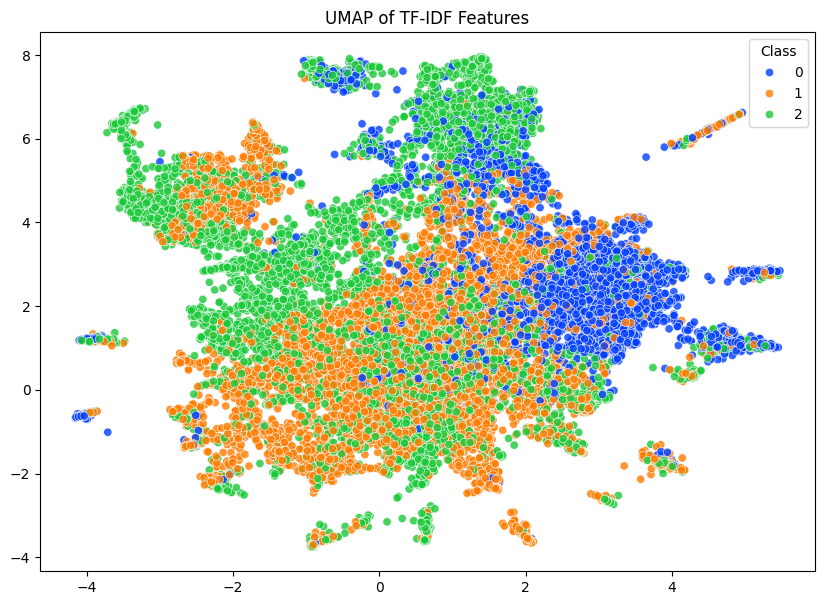

In [41]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='UMAP1', y='UMAP2', hue='class', palette='bright', data=umap_df, alpha=0.8)
plt.title('UMAP of TF-IDF Features')
plt.legend(title='Class')
plt.xlabel('')
plt.ylabel('')
plt.show()

Furthermore, using a non-linear dimensional reduction technique (*UMAP*), I have plotted the TF-IDF features divided by category. The plot clearly shows the emergence of the three classes, with class `0` distinctly different from the other two, while classes `1` and `2` appear to divide into macro areas without being sharply distinct.

#### **Class Distribution**

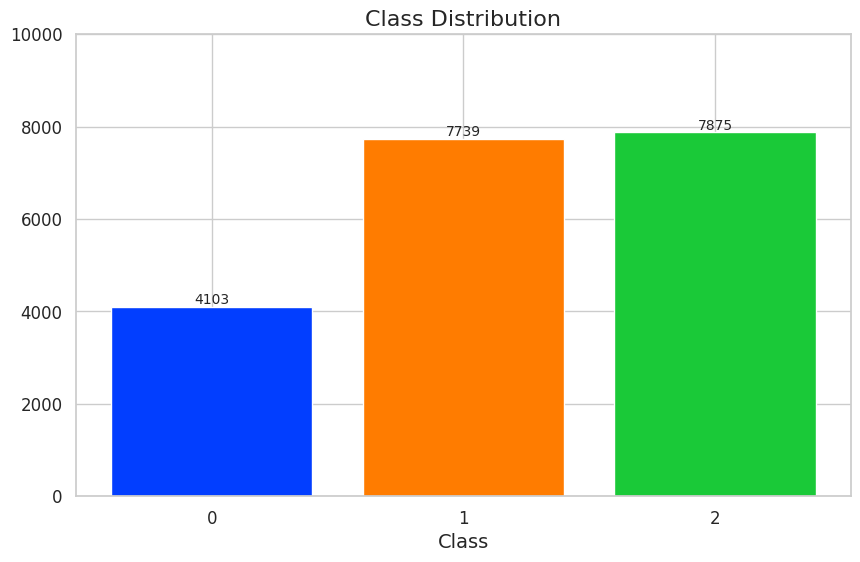

In [42]:
sorted_class_counts = sorted(Counter(graph.y.tolist()).items())
classes, counts = zip(*sorted_class_counts)

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
bars = plt.bar(classes, counts, color=sns.color_palette("bright")[0:len(classes)])

plt.xlabel('Class', fontsize=14)
plt.title('Class Distribution', fontsize=16)
plt.xticks(classes, fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0,10000)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, '%d' % int(height), ha='center', va='bottom', fontsize=10)

plt.show()

We can see from the following plot that class 0 is imbalanced compared to classes 1 and 2, as it has roughly half the values of each of the other two classes individually. Namely:

*   Class 0 $≃$ 20.80% of the dataset
*   Class 1 $≃$ 39.25% of the dataset
*   Class 2 $≃$ 39.94% of the dataset
   



### **GNN Model Implementation** -> **Node Classification**

In [43]:
split = T.RandomNodeSplit(num_val=0.1, num_test=0.2)
graph = split(graph)
graph

Data(x=[19717, 500], edge_index=[2, 88648], y=[19717], train_mask=[19717], val_mask=[19717], test_mask=[19717])

**GCN**

In [44]:
class GCN(torch.nn.Module):
    def __init__(self, dataset):
        super(GCN, self).__init__()
        self.dataset = dataset
        self.conv1 = GCNConv(dataset.num_node_features, 64)
        self.conv2 = GCNConv(64, dataset.num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

**GraphSAGE**

In [45]:
class GraphSAGE(torch.nn.Module):
    def __init__(self, dataset):
        super(GraphSAGE, self).__init__()

        self.dataset = dataset

        self.conv1 = SAGEConv(dataset.num_node_features, 64)
        self.conv2 = SAGEConv(64, dataset.num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)

        return F.log_softmax(x, dim=1)

**GAT**

In [46]:
class GAT(torch.nn.Module):
    def __init__(self, dataset):
        super(GAT, self).__init__()

        self.dataset = dataset

        self.conv1 = GATConv(dataset.num_node_features, 8, heads=8, dropout=0.6)
        self.conv2 = GATConv(8 * 8, dataset.num_classes, heads=1, concat=True, dropout=0.6)
        self.leaky_relu = nn.LeakyReLU(0.2)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = self.conv1(x, edge_index)
        x = self.leaky_relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)

        return F.log_softmax(x, dim=1)

**Train and Evaluation**

In [47]:
def train_node_classifier(model, graph, optimizer, criterion, n_epochs = 200):

	train_lss_curve = []

	for epoch in range(1, n_epochs+1):
		model.train()
		optimizer.zero_grad()

		out 	= model(graph)
		loss	= criterion(out[graph.train_mask], graph.y[graph.train_mask])

		train_lss_curve.append(loss.item())

		loss.backward()
		optimizer.step()

		accuracy, precision, recall_, f1	= evaluate(model, graph, graph.val_mask)

		if epoch%25 == 0 :
			print(f'Epoch {epoch}, Train loss {loss:.3f}')
			print(f'Val accuracy {accuracy:.3f}, Val precision {precision:.3f}, Val recall {recall_:.3f}, Val f1 {f1:.3f}')

	return model, train_lss_curve

In [48]:
def evaluate(model, data, mask):
    model.eval()

    logits = model(data)
    pred = logits[mask].max(1)[1]
    label = data.y[mask]

    accuracy = accuracy_score(label.cpu(), pred.cpu())
    precision = precision_score(label.cpu(), pred.cpu(), average='macro', zero_division=0)
    recall = recall_score(label.cpu(), pred.cpu(), average='macro')
    f1 = f1_score(label.cpu(), pred.cpu(), average='macro')

    return accuracy, precision, recall, f1



---



In [49]:
lr = 0.01
wd = 5e-4
n_epochs = 200

gcn = GCN(dataset).to('cpu')

optimizer_gcn = Adam(gcn.parameters(), lr=lr, weight_decay=wd)
criterion = nn.CrossEntropyLoss()

gcn_, train_lss_curve_gcn = train_node_classifier(gcn, graph, optimizer_gcn, criterion, n_epochs)

print("\n GCN: ")
test_accuracy_GCN, test_precision_GCN, test_recall_GCN, test_f1_GCN = evaluate(gcn_, graph, graph.test_mask)
print(f' --> Test accuracy {test_accuracy_GCN:.2f}%')
print(f' --> Test precision {test_precision_GCN:.2f}%')
print(f' --> Test recall {test_recall_GCN:.2f}%')
print(f' --> Test f1 {test_f1_GCN:.2f}%')

Epoch 25, Train loss 0.534
Val accuracy 0.827, Val precision 0.823, Val recall 0.815, Val f1 0.818
Epoch 50, Train loss 0.423
Val accuracy 0.854, Val precision 0.850, Val recall 0.841, Val f1 0.845
Epoch 75, Train loss 0.389
Val accuracy 0.862, Val precision 0.858, Val recall 0.850, Val f1 0.853
Epoch 100, Train loss 0.372
Val accuracy 0.865, Val precision 0.860, Val recall 0.854, Val f1 0.856
Epoch 125, Train loss 0.361
Val accuracy 0.867, Val precision 0.864, Val recall 0.853, Val f1 0.858
Epoch 150, Train loss 0.358
Val accuracy 0.870, Val precision 0.866, Val recall 0.860, Val f1 0.862
Epoch 175, Train loss 0.352
Val accuracy 0.866, Val precision 0.863, Val recall 0.854, Val f1 0.858
Epoch 200, Train loss 0.348
Val accuracy 0.868, Val precision 0.864, Val recall 0.857, Val f1 0.860

 GCN: 
 --> Test accuracy 0.88%
 --> Test precision 0.87%
 --> Test recall 0.87%
 --> Test f1 0.87%


In [50]:
lr = 0.01
wd = 5e-4
n_epochs = 200

gSAGE = GraphSAGE(dataset).to('cpu')

optimizer_gSAGE = Adam(gSAGE.parameters(), lr=lr, weight_decay=wd)
criterion = nn.CrossEntropyLoss()

gSAGE_, train_lss_curve_gSAGE = train_node_classifier(gSAGE, graph, optimizer_gSAGE, criterion, n_epochs)

print("\n gSAGE: ")
test_accuracy_gSAGE, test_precision_gSAGE, test_recall_gSAGE, test_f1_gSAGE = evaluate(gSAGE_, graph, graph.test_mask)
print(f' --> Test accuracy {test_accuracy_gSAGE:.2f}%')
print(f' --> Test precision {test_precision_gSAGE:.2f}%')
print(f' --> Test recall {test_recall_gSAGE:.2f}%')
print(f' --> Test f1 {test_f1_gSAGE:.2f}%')

Epoch 25, Train loss 0.393
Val accuracy 0.836, Val precision 0.831, Val recall 0.825, Val f1 0.827
Epoch 50, Train loss 0.324
Val accuracy 0.867, Val precision 0.865, Val recall 0.854, Val f1 0.859
Epoch 75, Train loss 0.289
Val accuracy 0.876, Val precision 0.873, Val recall 0.866, Val f1 0.869
Epoch 100, Train loss 0.271
Val accuracy 0.876, Val precision 0.872, Val recall 0.866, Val f1 0.868
Epoch 125, Train loss 0.257
Val accuracy 0.882, Val precision 0.879, Val recall 0.873, Val f1 0.875
Epoch 150, Train loss 0.247
Val accuracy 0.881, Val precision 0.879, Val recall 0.869, Val f1 0.873
Epoch 175, Train loss 0.244
Val accuracy 0.881, Val precision 0.879, Val recall 0.870, Val f1 0.874
Epoch 200, Train loss 0.238
Val accuracy 0.884, Val precision 0.881, Val recall 0.874, Val f1 0.877

 gSAGE: 
 --> Test accuracy 0.89%
 --> Test precision 0.89%
 --> Test recall 0.89%
 --> Test f1 0.89%


In [51]:
lr = 0.03
wd = 5e-4
n_epochs = 200

GATv = GAT(dataset).to('cpu')

optimizer_GAT = Adam(GATv.parameters(), lr=lr, weight_decay=wd)
criterion = nn.CrossEntropyLoss()

GAT_, train_lss_curve_GAT = train_node_classifier(GATv, graph, optimizer_GAT, criterion, n_epochs)

print("\n GAT: ")
test_accuracy_GAT, test_precision_GAT, test_recall_GAT, test_f1_GAT = evaluate(GAT_, graph, graph.test_mask)
print(f' --> Test accuracy {test_accuracy_GAT:.2f}%')
print(f' --> Test precision {test_precision_GAT:.2f}%')
print(f' --> Test recall {test_recall_GAT:.2f}%')
print(f' --> Test f1 {test_f1_GAT:.2f}%')

Epoch 25, Train loss 0.597
Val accuracy 0.852, Val precision 0.852, Val recall 0.835, Val f1 0.841
Epoch 50, Train loss 0.580
Val accuracy 0.849, Val precision 0.849, Val recall 0.834, Val f1 0.839
Epoch 75, Train loss 0.574
Val accuracy 0.849, Val precision 0.848, Val recall 0.829, Val f1 0.837
Epoch 100, Train loss 0.572
Val accuracy 0.854, Val precision 0.851, Val recall 0.838, Val f1 0.842
Epoch 125, Train loss 0.574
Val accuracy 0.857, Val precision 0.850, Val recall 0.844, Val f1 0.846
Epoch 150, Train loss 0.578
Val accuracy 0.848, Val precision 0.853, Val recall 0.826, Val f1 0.835
Epoch 175, Train loss 0.567
Val accuracy 0.848, Val precision 0.853, Val recall 0.823, Val f1 0.834
Epoch 200, Train loss 0.579
Val accuracy 0.851, Val precision 0.845, Val recall 0.837, Val f1 0.840

 GAT: 
 --> Test accuracy 0.87%
 --> Test precision 0.86%
 --> Test recall 0.86%
 --> Test f1 0.86%


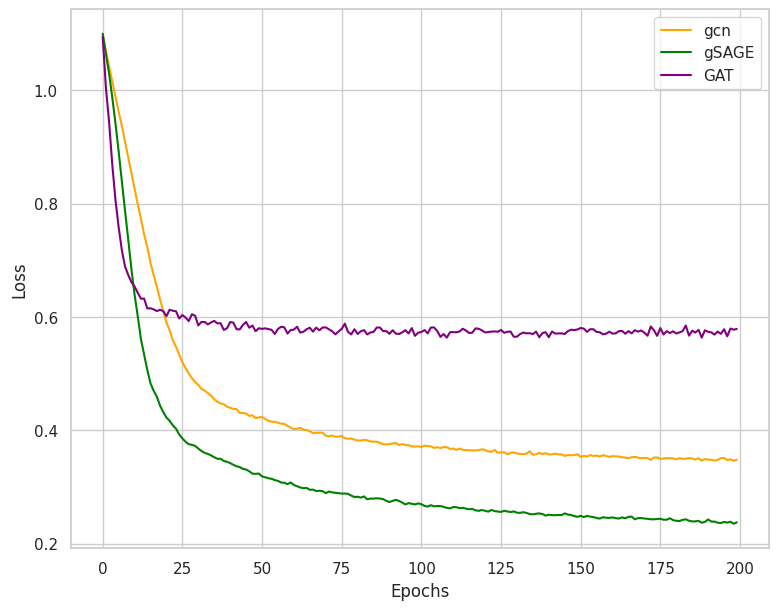

In [52]:
plt.figure(figsize=(9,7))

plt.plot(range(n_epochs), train_lss_curve_gcn, label='gcn', color='orange')
plt.plot(range(n_epochs), train_lss_curve_gSAGE, label='gSAGE', color='green')
plt.plot(range(n_epochs), train_lss_curve_GAT, label='GAT', color='purple')

plt.ylabel("Loss")
plt.xlabel("Epochs")

plt.legend()

plt.show()

In [53]:
node_classifiers_df = pd.DataFrame()
node_classifiers_df['model_names'] = ['GCN', 'GraphSAGE', 'GAT']
node_classifiers_df['accuracy'] = [ test_accuracy_GCN, test_accuracy_gSAGE, test_accuracy_GAT]
node_classifiers_df['precision'] = [ test_precision_GCN, test_precision_gSAGE, test_precision_GAT]
node_classifiers_df['recall'] = [ test_recall_GCN, test_recall_gSAGE, test_recall_GAT]
node_classifiers_df['F1'] = [ test_f1_GCN, test_f1_gSAGE, test_f1_GAT]

In [54]:
node_classifiers_df

,model_names,accuracy,precision,recall,F1
0,GCN,0.878773,0.874490,0.873656,0.873603
1,GraphSAGE,0.894750,0.894572,0.890381,0.892071
2,GAT,0.866092,0.860847,0.860865,0.860049


### **GNN Model Implementation** -> **Link Prediction**

**Model and Functions definition**

In [55]:
class Net(nn.Module):
	def __init__(self, in_channels, hidden_channels, out_channels):
		super().__init__()
		self.conv1 = GCNConv(in_channels, hidden_channels)
		self.conv2 = GCNConv(hidden_channels, out_channels)

	def encode(self, x, edge_index):
		x = self.conv1(x, edge_index).relu()
		x = self.conv2(x,edge_index)
		return x

	def decode(self, z, edge_label_index):
		return (z[edge_label_index[0]] * z[edge_label_index[1]]).sum(dim=-1)

	def decode_all(self, z):
		prob_adj = z @ z.t()
		return (prob_adj > 0).nonzero(as_tuple=False).t()

In [56]:
def mean_reciprocal_rank(preds, labels):
    ranks = []

    for pred, label in zip(preds, labels):
        sorted_indices = np.argsort(pred)[::-1]
        rank_indices = np.where(sorted_indices == label)[0]

        if len(rank_indices) > 0:
            rank = rank_indices[0] + 1
            ranks.append(1.0 / rank)
        else:
            ranks.append(0.0)

    return sum(ranks) / len(ranks) if ranks else 0

In [57]:
def hits_at_k(preds, labels, k):
    hits = 0
    for pred, label in zip(preds, labels):
        top_k = pred.argsort()[::-1][:k]
        if label in top_k:
            hits += 1

    return hits / len(labels)

In [58]:
def train_link_predictor(model, train_data, val_data, optimizer, criterion, n_epochs=100):
	train_lss_curve = []
	val_auc_curve		= []

	for epoch in range(1, n_epochs + 1):
		model.train()
		optimizer.zero_grad()

		z = model.encode(train_data.x, train_data.edge_index)

		neg_edge_index = negative_sampling(
				edge_index = train_data.edge_index,
				num_nodes = train_data.num_nodes,
				num_neg_samples = train_data.edge_label_index.size(1),
				method='sparse'
			)

		edge_label_index = cat(
				[train_data.edge_label_index, neg_edge_index],
				dim=-1,
			)

		edge_label = cat(
			[
				train_data.edge_label,
				train_data.edge_label.new_zeros(neg_edge_index.size(1))
			],
			dim=0
		)

		out	= model.decode(z, edge_label_index).view(-1)

		loss = criterion(out, edge_label)
		train_lss_curve.append(loss.item())

		loss.backward()
		optimizer.step()

		val_auc, val_f1, val_mrr, val_hits = eval_link_predictor(model, val_data)
		val_auc_curve.append(val_auc.item())

		if epoch % 10 == 0:
			print(f"Epoch: {epoch:03d}, Train Loss: {loss:.3f}, Val AUC: {val_auc:.3f}, Val F1: {val_f1}, Val MRR: {val_mrr}, Val Hits@20: {val_hits}")

	return model, train_lss_curve, val_auc_curve

In [59]:
@no_grad()
def eval_link_predictor(model, data, k=20):
    model.eval()

    z 	= model.encode(data.x, data.edge_index)
    out = model.decode(z, data.edge_label_index).view(-1).sigmoid()

    preds = out.cpu().numpy()
    labels = data.edge_label.cpu().numpy()

    auc = roc_auc_score(labels, preds)
    f1 = f1_score(labels, preds >= 0.5)

    mrr = mean_reciprocal_rank(preds, labels)
    hits = hits_at_k(preds, labels, k)

    return auc, f1, mrr, hits

**Training and Evaluation**

In [60]:
split = T.RandomLinkSplit(
	num_val=0.1,
	num_test=0.1,
	is_undirected=True,
	add_negative_train_samples=False,
	neg_sampling_ratio=1.0
)

train_data, val_data, test_data = split(graph)

In [61]:
n_epochs = 100
lr = 0.01
wd = 5e-4
in_channels = dataset.num_features
hidden_channels = 64
out_channels = 32
k=20

model_lp_ = Net(dataset.num_features, hidden_channels, out_channels).to('cpu')

optimizer_lp = Adam(params=model_lp_.parameters(), lr=lr, weight_decay=wd)
criterion_lp = nn.BCEWithLogitsLoss()

model_lp, train_lss_curve_lp, val_auc_curve_lp = train_link_predictor(model_lp_, train_data, val_data, optimizer_lp, criterion_lp, n_epochs)

test_auc, test_f1, test_MRR, test_hits = eval_link_predictor(model_lp, test_data, k)
print(f"\n Test: AUC -> {test_auc:.2f}%, F1 ->{test_f1}, MRR ->{test_MRR}, Hits@{k} ->{test_hits}")

Epoch: 010, Train Loss: 0.627, Val AUC: 0.788, Val F1: 0.6666666666666666, Val MRR: 0.5, Val Hits@20: 0.5
Epoch: 020, Train Loss: 0.552, Val AUC: 0.854, Val F1: 0.7519434628975264, Val MRR: 0.5, Val Hits@20: 0.5
Epoch: 030, Train Loss: 0.529, Val AUC: 0.893, Val F1: 0.757293497363796, Val MRR: 0.5, Val Hits@20: 0.5
Epoch: 040, Train Loss: 0.495, Val AUC: 0.911, Val F1: 0.7778790087463556, Val MRR: 0.5, Val Hits@20: 0.5
Epoch: 050, Train Loss: 0.480, Val AUC: 0.918, Val F1: 0.7807720320466133, Val MRR: 0.5, Val Hits@20: 0.5
Epoch: 060, Train Loss: 0.481, Val AUC: 0.917, Val F1: 0.7833394227256119, Val MRR: 0.5, Val Hits@20: 0.5
Epoch: 070, Train Loss: 0.479, Val AUC: 0.920, Val F1: 0.7832435885735146, Val MRR: 0.5, Val Hits@20: 0.5
Epoch: 080, Train Loss: 0.480, Val AUC: 0.917, Val F1: 0.7829826166514181, Val MRR: 0.5, Val Hits@20: 0.5
Epoch: 090, Train Loss: 0.481, Val AUC: 0.919, Val F1: 0.7842778793418647, Val MRR: 0.5, Val Hits@20: 0.5
Epoch: 100, Train Loss: 0.478, Val AUC: 0.921, 